In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob
import seaborn as sns
import statsmodels.api as sm
import sklearn.preprocessing

In [94]:
# Read in rb stats files
rbStatsFiles = [filename for filename in glob.glob("C:/Users/Michael/Desktop/Springboard/Capstone2/csvFiles/DFS_Data/RB/stats/*.csv")]
rbStatsFiles[0]

'C:/Users/Michael/Desktop/Springboard/Capstone2/csvFiles/DFS_Data/RB/stats\\RB2011.csv'

In [95]:
# Extract season and fix playoff weeks to match other tables

dfs = []
dfsPlayoffs = []

for i in range(int(len(rbStatsFiles)/2)):
    df = pd.read_csv(rbStatsFiles[i])
    df['season'] = rbStatsFiles[i][-8:-4]
    dfs.append(df)

# second half of list has playoff games, need to fix their weeks, then combine with first table    
for i in range(int(len(rbStatsFiles)/2),int(len(rbStatsFiles)/2)*2):
    dfPlayoffs = pd.read_csv(rbStatsFiles[i])
    dfPlayoffs['season'] = rbStatsFiles[i][-8:-4]
    dfsPlayoffs.append(dfPlayoffs)

    
for i in range(len(dfsPlayoffs)):
    dfsPlayoffs[i].loc[dfsPlayoffs[i].Week == 1, 'Week'] = 18
    dfsPlayoffs[i].loc[dfsPlayoffs[i].Week == 2, 'Week'] = 19
    dfsPlayoffs[i].loc[dfsPlayoffs[i].Week == 3, 'Week'] = 20
    dfsPlayoffs[i].loc[dfsPlayoffs[i].Week == 4, 'Week'] = 21


# dfsPlayoffs[-1].head()

rb = pd.concat(dfs,axis=0)
rb = rb.append(dfsPlayoffs)
rb.head()

,Rank,Name,Team,Position,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameFanDuel,FantasyPointsFanDuel,season
0,1,Arian Foster,HOU,RB,7,TEN,25,115,4.6,2,5,5,119,1,0,0,43.9,43.9,2011
1,2,Maurice Jones-Drew,JAX,RB,14,TB,27,85,3.1,2,6,6,51,2,0,0,40.6,40.6,2011
2,3,Kevin Smith,DET,RB,11,CAR,16,140,8.8,2,4,4,61,1,0,0,40.1,40.1,2011
3,4,CJ Spiller,BUF,RB,15,MIA,12,91,7.6,1,11,9,76,1,0,0,33.2,33.2,2011
4,5,Steven Jackson,LAR,RB,8,NO,25,159,6.4,2,5,4,32,0,0,0,33.1,33.1,2011


In [96]:
# Pull data from other workbooks
# Pull data from other workbooks
awayMatchup = pd.read_csv('C://Users//Michael//Desktop//Springboard//Capstone2//csvFiles//awayMatchup.csv',index_col=0)
homeMatchup = pd.read_csv('C://Users//Michael//Desktop//Springboard//Capstone2//csvFiles//homeMatchup.csv',index_col=0)
oddsTable = pd.read_csv('C://Users//Michael//Desktop//Springboard//Capstone2//csvFiles//oddsTable.csv',index_col=0)
finalTeamGameDataTable = pd.read_csv('C://Users//Michael//Desktop//Springboard//Capstone2//csvFiles//teamGameData.csv',index_col=0)
rollAvgGameData = pd.read_csv('C://Users//Michael//Desktop//Springboard//Capstone2//csvFiles//rollAvgGameData.csv',index_col=0)
%store -r awayTable
%store -r homeTable

In [97]:
# Clean up the Team column to match the team column in awayTable and homeTable
teams1 = set(rb['Team'])
teams1.remove('SF')
teams2 = set(awayTable['team'])
teams2.remove('San Francisco 49ers')
t1List = list(teams1)
t2List = list(teams2)
t1List.sort()
t2List.sort()
zipTeams = zip(t1List, t2List)
teamDict = dict(list(zipTeams))
teamDict['SF'] = 'San Francisco 49ers'
teamDict

{'ARI': 'Arizona Cardinals',
 'ATL': 'Atlanta Falcons',
 'BAL': 'Baltimore Ravens',
 'BUF': 'Buffalo Bills',
 'CAR': 'Carolina Panthers',
 'CHI': 'Chicago Bears',
 'CIN': 'Cincinnati Bengals',
 'CLE': 'Cleveland Browns',
 'DAL': 'Dallas Cowboys',
 'DEN': 'Denver Broncos',
 'DET': 'Detroit Lions',
 'GB': 'Green Bay Packers',
 'HOU': 'Houston Texans',
 'IND': 'Indianapolis Colts',
 'JAX': 'Jacksonville Jaguars',
 'KC': 'Kansas City Chiefs',
 'LAC': 'Los Angeles Chargers',
 'LAR': 'Los Angeles Rams',
 'MIA': 'Miami Dolphins',
 'MIN': 'Minnesota Vikings',
 'NE': 'New England Patriots',
 'NO': 'New Orleans Saints',
 'NYG': 'New York Giants',
 'NYJ': 'New York Jets',
 'OAK': 'Oakland Raiders',
 'PHI': 'Philadelphia Eagles',
 'PIT': 'Pittsburgh Steelers',
 'SEA': 'Seattle Seahawks',
 'TB': 'Tampa Bay Buccaneers',
 'TEN': 'Tennessee Titans',
 'WAS': 'Washington Redskins',
 'SF': 'San Francisco 49ers'}

In [98]:
teamDict2 = {'ARI': 'Cardinals',
 'ATL': 'Falcons',
 'BAL': 'Ravens',
 'BUF': 'Bills',
 'CAR': 'Panthers',
 'CHI': 'Bears',
 'CIN': 'Bengals',
 'CLE': 'Browns',
 'DAL': 'Cowboys',
 'DEN': 'Broncos',
 'DET': 'Lions',
 'GB': 'Packers',
 'HOU': 'Texans',
 'IND': 'Colts',
 'JAX': 'Jaguars',
 'KC': 'Chiefs',
 'LAC': 'Chargers',
 'LAR': 'Rams',
 'MIA': 'Dolphins',
 'MIN': 'Vikings',
 'NE': 'Patriots',
 'NO': 'Saints',
 'NYG': 'Giants',
 'NYJ': 'Jets',
 'OAK': 'Raiders',
 'PHI': 'Eagles',
 'PIT': 'Steelers',
 'SEA': 'Seahawks',
 'TB': 'Buccaneers',
 'TEN': 'Titans',
 'WAS': 'Redskins',
 'SF': '49ers'}

In [99]:
teamDict3 = zip(teamDict.values(),teamDict2.values())
teamDict3 = dict(list(teamDict3))
teamDict3

{'Arizona Cardinals': 'Cardinals',
 'Atlanta Falcons': 'Falcons',
 'Baltimore Ravens': 'Ravens',
 'Buffalo Bills': 'Bills',
 'Carolina Panthers': 'Panthers',
 'Chicago Bears': 'Bears',
 'Cincinnati Bengals': 'Bengals',
 'Cleveland Browns': 'Browns',
 'Dallas Cowboys': 'Cowboys',
 'Denver Broncos': 'Broncos',
 'Detroit Lions': 'Lions',
 'Green Bay Packers': 'Packers',
 'Houston Texans': 'Texans',
 'Indianapolis Colts': 'Colts',
 'Jacksonville Jaguars': 'Jaguars',
 'Kansas City Chiefs': 'Chiefs',
 'Los Angeles Chargers': 'Chargers',
 'Los Angeles Rams': 'Rams',
 'Miami Dolphins': 'Dolphins',
 'Minnesota Vikings': 'Vikings',
 'New England Patriots': 'Patriots',
 'New Orleans Saints': 'Saints',
 'New York Giants': 'Giants',
 'New York Jets': 'Jets',
 'Oakland Raiders': 'Raiders',
 'Philadelphia Eagles': 'Eagles',
 'Pittsburgh Steelers': 'Steelers',
 'Seattle Seahawks': 'Seahawks',
 'Tampa Bay Buccaneers': 'Buccaneers',
 'Tennessee Titans': 'Titans',
 'Washington Redskins': 'Redskins',
 'Sa

In [100]:
# Map dictionary keys to new values so we have matching team/opponent names across the board
rb['Team'] = rb['Team'].map(teamDict2)
rb['Opponent'] = rb['Opponent'].map(teamDict2)

# qbSalaries['Team'] = qbSalaries['Team'].map(teamDict2)
# qbSalaries['Opponent'] = qbSalaries['Opponent'].map(teamDict2)


awayMatchup['team_x'] = awayMatchup['team_x'].map(teamDict3)
awayMatchup['team_y'] = awayMatchup['team_y'].map(teamDict3)
homeMatchup['team_x'] = homeMatchup['team_x'].map(teamDict3)
homeMatchup['team_y'] = homeMatchup['team_y'].map(teamDict3)

awayMatchup.head()

,gameId,date,season,week,team_x,homeAway,stadium,roof,surface,avgPf,...,defDvoa,ptsMatchup,offMatchup,ovrMatchup,passMatchup,pblkMatchup,runMatchup,offDvoaMatchup,totalDvoaMatchup,pf
0,201811110kan,2018-11-11,2018,10,Cardinals,away,Arrowhead Stadium,outdoors,grass,14.857143,...,0.065,37.857143,-10.285714,-13.857143,-10.600000,-16.071429,0.657143,-0.315,-0.700,14
1,201610300car,2016-10-30,2016,8,Cardinals,away,Bank of America Stadium,outdoors,grass,22.714286,...,0.036,51.285714,3.000000,4.457143,-2.228571,3.257143,-3.157143,-0.039,0.208,20
2,201612240sea,2016-12-24,2016,16,Cardinals,away,CenturyLink Field,outdoors,turf,25.857143,...,-0.114,43.857143,0.757143,-3.042857,7.171429,-14.242857,-9.314286,-0.250,-0.160,34
3,201812300sea,2018-12-30,2018,17,Cardinals,away,CenturyLink Field,outdoors,turf,13.000000,...,0.016,36.857143,-7.400000,-13.642857,-7.628571,-6.100000,-7.414286,-0.409,-0.500,24
4,201712310sea,2017-12-31,2017,17,Cardinals,away,CenturyLink Field,outdoors,turf,18.571429,...,-0.036,41.000000,-9.228571,-2.514286,-15.628571,-5.085714,-6.285714,-0.227,-0.159,26


In [101]:
#turn seasons to numeric instead of strings
rb['season'] = pd.to_numeric(rb['season'])
# qbSalaries['season'] = pd.to_numeric(qbSalaries['season'])

# Merge qb table with matchup tables, then puth the two together
rbTable1 = pd.merge(rb,awayMatchup,how='inner',left_on=['Team','season','Week'],right_on=['team_x','season','week'])

rbTable2 = pd.merge(rb,homeMatchup,how='inner',left_on=['Team','season','Week'],right_on=['team_x','season','week'])

rbTableFinal = pd.concat([rbTable1,rbTable2],axis=0)

rbTableFinal.head()

# rbTableFinal = pd.merge(rbTable,rbSalaries,how='inner',left_on=['Name', 'Team', 'Position', 'Week', 'Opponent','season'],right_on=['Name', 'Team', 'Position', 'Week', 'Opponent','season'])
# rbTableFinal.columns

,Rank,Name,Team,Position,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,...,defDvoa,ptsMatchup,offMatchup,ovrMatchup,passMatchup,pblkMatchup,runMatchup,offDvoaMatchup,totalDvoaMatchup,pf
0,1,Arian Foster,Texans,RB,7,Titans,25,115,4.6,2,...,-0.008,46.571429,14.114286,4.500000,9.714286,15.371429,-5.071429,0.124,-0.049,41
1,388,Ben Tate,Texans,RB,7,Titans,15,104,6.9,0,...,-0.008,46.571429,14.114286,4.500000,9.714286,15.371429,-5.071429,0.124,-0.049,41
2,1312,Derrick Ward,Texans,RB,7,Titans,5,7,1.4,0,...,-0.008,46.571429,14.114286,4.500000,9.714286,15.371429,-5.071429,0.124,-0.049,41
3,1454,Lawrence Vickers,Texans,FB,7,Titans,1,0,0.0,0,...,-0.008,46.571429,14.114286,4.500000,9.714286,15.371429,-5.071429,0.124,-0.049,41
4,7,Ray Rice,Ravens,RB,17,Bengals,24,191,8.0,2,...,0.054,43.571429,7.800000,7.657143,6.257143,12.628571,0.428571,0.128,0.210,24


In [102]:
rbs = rbTableFinal[(rbTableFinal['RushingAttempts'] + rbTableFinal['ReceivingTargets'] >= 10)]

In [103]:
rbs.head()

,Rank,Name,Team,Position,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,...,defDvoa,ptsMatchup,offMatchup,ovrMatchup,passMatchup,pblkMatchup,runMatchup,offDvoaMatchup,totalDvoaMatchup,pf
0,1,Arian Foster,Texans,RB,7,Titans,25,115,4.6,2,...,-0.008,46.571429,14.114286,4.500000,9.714286,15.371429,-5.071429,0.124,-0.049,41
1,388,Ben Tate,Texans,RB,7,Titans,15,104,6.9,0,...,-0.008,46.571429,14.114286,4.500000,9.714286,15.371429,-5.071429,0.124,-0.049,41
4,7,Ray Rice,Ravens,RB,17,Bengals,24,191,8.0,2,...,0.054,43.571429,7.800000,7.657143,6.257143,12.628571,0.428571,0.128,0.210,24
7,8,Arian Foster,Texans,RB,10,Buccaneers,17,84,4.9,1,...,0.101,49.714286,19.128571,13.871429,18.585714,11.614286,4.942857,0.286,0.230,37
8,303,Ben Tate,Texans,RB,10,Buccaneers,13,63,4.8,1,...,0.101,49.714286,19.128571,13.871429,18.585714,11.614286,4.942857,0.286,0.230,37


In [104]:
rbs = pd.merge(rbs,oddsTable,how='right',left_on=['Team','season','Week'],right_on=['team','season','week'])

In [105]:
rbs.loc[rbs.pf > rbs.pa, 'winLose'] = 'Win'
rbs.loc[rbs.pf < rbs.pa, 'winLose'] = 'Loss'
rbs.loc[rbs.pf == rbs.pa, 'winLose'] = 'Tie'

rbs.loc[rbs.totalScore > rbs.total, 'result'] = 'over'
rbs.loc[rbs.totalScore < rbs.total, 'result'] = 'under'
rbs.loc[rbs.totalScore == rbs.total, 'result'] = 'push'

In [106]:
rbs.columns

Index(['Rank', 'Name', 'Team', 'Position', 'Week', 'Opponent',
       'RushingAttempts', 'RushingYards', 'RushingYardsPerAttempt',
       'RushingTouchdowns', 'ReceivingTargets', 'Receptions', 'ReceivingYards',
       'ReceivingTouchdowns', 'Fumbles', 'FumblesLost',
       'FantasyPointsPerGameFanDuel', 'FantasyPointsFanDuel', 'season',
       'gameId', 'date_x', 'week_x', 'team_x', 'homeAway', 'stadium', 'roof',
       'surface', 'avgPf', 'avgOvr_x', 'avgOff', 'avgPass', 'avgPblk',
       'avgRecv', 'avgRun', 'avgRblk', 'totalDvoa_x', 'offDvoa', 'stDvoa',
       'overUnder', 'pa', 'totalScore', 'team_y', 'avgPa', 'avgOvr_y',
       'avgDef', 'avgRdef', 'avgPrsh', 'avgCov', 'totalDvoa_y', 'defDvoa',
       'ptsMatchup', 'offMatchup', 'ovrMatchup', 'passMatchup', 'pblkMatchup',
       'runMatchup', 'offDvoaMatchup', 'totalDvoaMatchup', 'pf', 'date_y',
       'week_y', 'team', 'spread', 'total', 'moneyLine', 'homeOrAway',
       'impliedTotal', 'winLose', 'result'],
      dtype='object')

In [114]:
rbVars = ['Name', 'Team', 'Position','season', 'Week', 'Opponent', 'homeAway', 'surface','RushingAttempts', 'ReceivingTargets', 'avgRdef','defDvoa','passMatchup','offMatchup','offDvoaMatchup','spread','total', 'moneyLine','impliedTotal','pf', 'winLose', 'result','FantasyPointsFanDuel']

In [115]:
newRbs = rbs[rbVars]

In [116]:
corr = newRbs.corr()
corr.style.background_gradient(cmap='coolwarm')

,season,Week,RushingAttempts,ReceivingTargets,avgRdef,defDvoa,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,pf,FantasyPointsFanDuel
season,1,0.00537282,-0.0828794,0.0572007,0.232062,-0.0570596,-0.0921588,-0.26667,-0.0879601,0.0008616,0.0800971,0.0140487,0.0446337,0.00296619,0.015073
Week,0.00537282,1,0.0232408,-0.0303399,0.0652478,0.0156159,-0.050498,-0.055567,0.00324162,-0.00986506,-0.0517267,-0.0288372,-0.0211679,-0.0322596,-0.00292008
RushingAttempts,-0.0828794,0.0232408,1,-0.195043,-0.00882722,0.0133461,-0.0251998,0.0118629,-0.0109815,-0.0338645,-0.075622,-0.0526051,-0.0150288,0.154585,0.47538
ReceivingTargets,0.0572007,-0.0303399,-0.195043,1,0.0218038,-0.00357507,0.0222624,0.000497328,0.0271203,0.0144919,0.0894858,0.0210633,0.0387276,-0.10791,0.297159
avgRdef,0.232062,0.0652478,-0.00882722,0.0218038,1,-0.286281,-0.179091,-0.522102,-0.189417,0.0930868,-0.129345,0.0793483,-0.14934,-0.0698199,-0.0294432
defDvoa,-0.0570596,0.0156159,0.0133461,-0.00357507,-0.286281,1,0.267301,0.342291,0.612064,-0.175994,0.202784,-0.146712,0.258737,0.0658949,0.0512655
passMatchup,-0.0921588,-0.050498,-0.0251998,0.0222624,-0.179091,0.267301,1,0.802072,0.547905,-0.488374,0.377419,-0.496499,0.613222,0.268277,0.0967905
offMatchup,-0.26667,-0.055567,0.0118629,0.000497328,-0.522102,0.342291,0.802072,1,0.578061,-0.459139,0.390705,-0.475841,0.596798,0.250154,0.106001
offDvoaMatchup,-0.0879601,0.00324162,-0.0109815,0.0271203,-0.189417,0.612064,0.547905,0.578061,1,-0.449314,0.431874,-0.428896,0.61203,0.235233,0.116653
spread,0.0008616,-0.00986506,-0.0338645,0.0144919,0.0930868,-0.175994,-0.488374,-0.459139,-0.449314,1,-0.0126137,0.966556,-0.824411,-0.344374,-0.122343


In [117]:
sb = newRbs[(newRbs['Name'] == 'Christian McCaffrey') & (newRbs['total'] >= 44)]
sb = sb[(sb['RushingAttempts'] + sb['ReceivingTargets']) >= 16]
sb[['Name','Team','Week','Opponent','homeAway','spread','FantasyPointsFanDuel']].sort_values('FantasyPointsFanDuel',ascending=False)

,Name,Team,Week,Opponent,homeAway,spread,FantasyPointsFanDuel
4585,Christian McCaffrey,Panthers,12.0,Seahawks,home,-3.0,41.2
2118,Christian McCaffrey,Panthers,10.0,Steelers,away,3.5,34.3
4599,Christian McCaffrey,Panthers,9.0,Buccaneers,home,-6.5,30.2
2144,Christian McCaffrey,Panthers,13.0,Buccaneers,away,-3.5,26.6
2153,Christian McCaffrey,Panthers,14.0,Browns,away,-1.0,25.1
4626,Christian McCaffrey,Panthers,16.0,Falcons,home,3.0,23.8
4296,Christian McCaffrey,Panthers,15.0,Packers,home,-3.0,22.6
4648,Christian McCaffrey,Panthers,15.0,Saints,home,6.0,22.0
4657,Christian McCaffrey,Panthers,3.0,Bengals,home,-3.0,20.4
4661,Christian McCaffrey,Panthers,8.0,Ravens,home,2.5,19.6


In [132]:
lookVars = ['Name','Opponent','season','Week','homeAway','defDvoa','spread','total','pf','impliedTotal','result','FantasyPointsFanDuel']

In [141]:
sb = newRbs[(newRbs['Team'] == 'Rams')]
sb = sb[(sb['season'] >= 2015) & (sb['RushingAttempts'] + sb['ReceivingTargets'] > 13) & (sb['defDvoa'] <= 0) & (sb['result'] == 'under')].sort_values('FantasyPointsFanDuel',ascending=False)# & (sb['homeAway'] == 'home')]
sb[lookVars]

,Name,Opponent,season,Week,homeAway,defDvoa,spread,total,pf,impliedTotal,result,FantasyPointsFanDuel
4595,Todd Gurley,Cardinals,2018,2.0,home,-0.022,-13.5,43.5,34.0,28.50,under,30.8
4289,Todd Gurley,Cardinals,2017,7.0,home,-0.001,-3.0,45.5,33.0,24.25,under,23.4
2169,CJ Anderson,Cardinals,2018,16.0,away,-0.023,-14.0,44.0,31.0,29.00,under,22.7
4359,Todd Gurley,Texans,2017,10.0,home,-0.088,-12.5,44.5,33.0,28.50,under,16.6
1306,Todd Gurley,Packers,2015,5.0,away,-0.032,9.0,45.0,10.0,18.00,under,15.9
4393,Todd Gurley,Saints,2017,12.0,home,-0.133,-2.5,54.0,26.0,28.25,under,14.8
4099,Todd Gurley,Dolphins,2016,11.0,home,-0.063,1.0,38.5,10.0,18.75,under,13.6
1939,Todd Gurley,Vikings,2017,11.0,away,-0.084,-1.5,46.0,7.0,23.75,under,13.1
4127,Todd Gurley,Giants,2016,7.0,home,-0.015,3.0,44.5,10.0,20.75,under,12.2
1671,Todd Gurley,Cardinals,2016,4.0,away,-0.231,9.5,43.5,17.0,17.00,under,10.7


,Name,season,Week,Opponent,homeAway,RushingAttempts,ReceivingTargets,defDvoa,offDvoaMatchup,spread,total,pf,result,winLose,impliedTotal,FantasyPointsFanDuel
4583,Derrick Henry,2018,14.0,Jaguars,home,17.0,0.0,-0.070,-0.202,-5.5,37.0,30.0,over,Win,21.25,47.8
4265,DeMarco Murray,2017,10.0,Bengals,home,14.0,4.0,-0.077,-0.075,-4.5,40.5,24.0,over,Win,22.50,27.2
3962,DeMarco Murray,2016,10.0,Packers,home,17.0,3.0,-0.081,-0.002,3.0,48.5,47.0,over,Win,22.75,27.0
1503,DeMarco Murray,2016,4.0,Texans,away,25.0,2.0,-0.219,-0.241,4.0,40.0,20.0,over,Loss,18.00,24.9
4315,Derrick Henry,2017,6.0,Colts,home,19.0,1.0,0.107,0.292,-6.5,46.0,36.0,over,Win,26.25,21.0
2185,Dion Lewis,2018,9.0,Cowboys,away,19.0,4.0,-0.028,-0.192,4.0,40.0,28.0,over,Win,18.00,20.2
4023,DeMarco Murray,2016,7.0,Colts,home,25.0,5.0,0.205,0.234,-4.0,48.5,26.0,over,Loss,26.25,20.2
4033,DeMarco Murray,2016,8.0,Jaguars,home,21.0,2.0,-0.047,0.007,-3.0,43.5,36.0,over,Win,23.25,19.3
4333,DeMarco Murray,2017,3.0,Seahawks,home,14.0,2.0,0.138,0.508,-2.5,41.5,33.0,over,Win,22.00,18.5
4034,Derrick Henry,2016,8.0,Jaguars,home,16.0,5.0,-0.047,0.007,-3.0,43.5,36.0,over,Win,23.25,17.7


In [65]:
targetPts = 18
totalInstances = len(gurley)
timesHit = len(gurley[gurley['FantasyPointsFanDuel'] > targetPts])

print(timesHit)
print(totalInstances)
print(timesHit/totalInstances)

0
0


ZeroDivisionError: division by zero

In [32]:
cmc = newRbs[(newRbs['Name'] == 'Christian McCaffrey')]
cmc = cmc[(cmc['season'] >= 2018) & (cmc['RushingAttempts'] + cmc['ReceivingTargets'] > 13)]#.sort_values('season')# & (sb['homeAway'] == 'home')]
cmc[cmc['total'] > 46]

,Name,Team,Position,season,Week,Opponent,homeAway,surface,RushingAttempts,ReceivingTargets,...,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,winLose,result,FantasyPointsFanDuel
2260,Christian McCaffrey,Panthers,RB,2018,10.0,Steelers,away,grass,14.0,5.0,...,14.414286,6.600000,0.206,3.5,51.0,170.0,23.75,Loss,over,34.3
2289,Christian McCaffrey,Panthers,RB,2018,13.0,Buccaneers,away,grass,10.0,10.0,...,10.828571,14.942857,0.295,-3.5,51.5,-178.0,27.50,Loss,under,26.6
2298,Christian McCaffrey,Panthers,RB,2018,14.0,Browns,away,grass,16.0,7.0,...,5.057143,7.928571,0.039,-1.0,48.0,-105.0,24.50,Loss,under,25.1
2418,Christian McCaffrey,Panthers,RB,2018,11.0,Lions,away,turf,13.0,8.0,...,13.328571,6.028571,0.314,-4.0,48.5,-200.0,26.25,Loss,under,14.0
4895,Christian McCaffrey,Panthers,RB,2018,12.0,Seahawks,home,grass,17.0,11.0,...,9.557143,5.971429,0.062,-3.0,46.5,-160.0,24.75,Loss,over,41.2
4912,Christian McCaffrey,Panthers,RB,2018,9.0,Buccaneers,home,grass,17.0,6.0,...,12.385714,9.042857,0.394,-6.5,56.0,-290.0,31.25,Win,over,30.2
4960,Christian McCaffrey,Panthers,RB,2018,15.0,Saints,home,grass,15.0,11.0,...,-3.685714,-8.928571,0.079,6.0,50.5,215.0,22.25,Loss,under,22.0


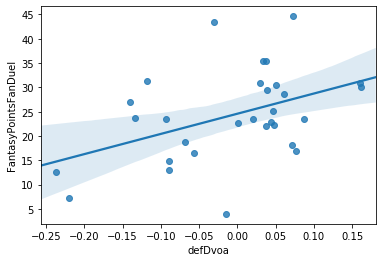

In [21]:
sns.regplot(sb['defDvoa'],sb['FantasyPointsFanDuel'])

In [22]:
class RB:
    
    rbVars = ['Name','FanDuelSalary', 'season', 'Week', 'Opponent', 'homeOrAway', 'impliedTotal', 'winLose', 'result','cashTarget', 'FantasyPointsFanDuel']
    
    def __init__(self,name,table):
        self.name = name
        self.table = table[table['Name'] == name]
        
    def get_table(self):
        return self.table
    
    def corrMatrix(self,features):
        correlations = self.table[features].corr()
        return correlations.style.background_gradient(cmap='coolwarm')
    
    def scatter(self,var1,var2):
        plt.scatter(self.table[var1],self.table[var2])
        plt.title(self.name)
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.show()
        
    def impliedTot(self, value):
        return self.table[self.table['impliedTotal'] >= value][qbVars]

In [30]:
sb = newRbs[(newRbs['Name'] == 'Christian McCaffrey') & (newRbs['season'] == 2018)]
sb.corr().style.background_gradient(cmap='coolwarm')

C:\Python37\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,season,Week,RushingAttempts,ReceivingTargets,avgRdef,defDvoa,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,FantasyPointsFanDuel
season,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Week,nan,1,0.154487,0.2338,-0.0628299,0.292281,0.259085,0.409893,0.349115,0.186946,0.587384,0.182095,0.255749,0.477127
RushingAttempts,nan,0.154487,1,-0.457941,0.0906921,-0.0741851,-0.0057947,0.0286246,0.0792153,-0.190234,0.0227864,-0.130437,0.145151,0.285346
ReceivingTargets,nan,0.2338,-0.457941,1,-0.00688911,0.0749653,-0.43124,-0.242854,-0.0561437,0.464664,-0.102846,0.418034,-0.385375,0.0514942
avgRdef,nan,-0.0628299,0.0906921,-0.00688911,1,-0.189469,-0.0296649,-0.453358,-0.0808542,0.336639,-0.0589942,0.376203,-0.269059,0.0231866
defDvoa,nan,0.292281,-0.0741851,0.0749653,-0.189469,1,0.44823,0.470082,0.904937,-0.513202,0.52408,-0.488622,0.693821,-0.00294955
passMatchup,nan,0.259085,-0.0057947,-0.43124,-0.0296649,0.44823,1,0.847044,0.614778,-0.526445,0.586607,-0.470714,0.743741,0.470316
offMatchup,nan,0.409893,0.0286246,-0.242854,-0.453358,0.470082,0.847044,1,0.582675,-0.503559,0.631122,-0.47362,0.757152,0.553102
offDvoaMatchup,nan,0.349115,0.0792153,-0.0561437,-0.0808542,0.904937,0.614778,0.582675,1,-0.423334,0.667605,-0.370705,0.726054,0.231541
spread,nan,0.186946,-0.190234,0.464664,0.336639,-0.513202,-0.526445,-0.503559,-0.423334,1,-0.116519,0.988947,-0.760882,0.0370985


In [31]:
sb[sb['total'] >= 45]

,Name,Team,Position,season,Week,Opponent,homeAway,surface,RushingAttempts,ReceivingTargets,...,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,winLose,result,FantasyPointsFanDuel
2260,Christian McCaffrey,Panthers,RB,2018,10.0,Steelers,away,grass,14.0,5.0,...,14.414286,6.600000,0.206,3.5,51.0,170.0,23.75,Loss,over,34.3
2289,Christian McCaffrey,Panthers,RB,2018,13.0,Buccaneers,away,grass,10.0,10.0,...,10.828571,14.942857,0.295,-3.5,51.5,-178.0,27.50,Loss,under,26.6
2298,Christian McCaffrey,Panthers,RB,2018,14.0,Browns,away,grass,16.0,7.0,...,5.057143,7.928571,0.039,-1.0,48.0,-105.0,24.50,Loss,under,25.1
2418,Christian McCaffrey,Panthers,RB,2018,11.0,Lions,away,turf,13.0,8.0,...,13.328571,6.028571,0.314,-4.0,48.5,-200.0,26.25,Loss,under,14.0
4895,Christian McCaffrey,Panthers,RB,2018,12.0,Seahawks,home,grass,17.0,11.0,...,9.557143,5.971429,0.062,-3.0,46.5,-160.0,24.75,Loss,over,41.2
4912,Christian McCaffrey,Panthers,RB,2018,9.0,Buccaneers,home,grass,17.0,6.0,...,12.385714,9.042857,0.394,-6.5,56.0,-290.0,31.25,Win,over,30.2
4936,Christian McCaffrey,Panthers,RB,2018,16.0,Falcons,home,grass,21.0,13.0,...,-3.414286,-2.214286,0.233,3.0,46.0,138.0,21.50,Loss,under,23.8
4960,Christian McCaffrey,Panthers,RB,2018,15.0,Saints,home,grass,15.0,11.0,...,-3.685714,-8.928571,0.079,6.0,50.5,215.0,22.25,Loss,under,22.0
